In [20]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader , Subset
import random

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cpu


In [3]:
# Set Seed

torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(42)
    random.seed(42)

g = torch.Generator()
g.manual_seed(42)

In [4]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
batch_size = 64
epochs = 10
learning_rate = 0.01
momentum = 0.9

In [6]:
# Download and load data

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50602855.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1618552.33it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13930634.58it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7473726.47it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
def train(model, train_loader, criterion, optimizer, epoch, device):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] '
                  f'Loss: {loss.item():.6f}')
    train_loss /= len(train_loader)
    return train_loss


In [8]:
def test(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')
    return test_loss, accuracy

In [9]:
model = MLP()
model.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [10]:
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(1, epochs + 1):
    train_loss = train(model, train_loader, criterion, optimizer, epoch, device)
    test_loss, accuracy = test(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)

Train Epoch: 1 [0/60000] Loss: 2.288695
Train Epoch: 1 [6400/60000] Loss: 0.474022
Train Epoch: 1 [12800/60000] Loss: 0.258329
Train Epoch: 1 [19200/60000] Loss: 0.370705
Train Epoch: 1 [25600/60000] Loss: 0.331916
Train Epoch: 1 [32000/60000] Loss: 0.151600
Train Epoch: 1 [38400/60000] Loss: 0.250964
Train Epoch: 1 [44800/60000] Loss: 0.177780
Train Epoch: 1 [51200/60000] Loss: 0.023561
Train Epoch: 1 [57600/60000] Loss: 0.174999

Test set: Average loss: 0.1361, Accuracy: 9559/10000 (95.59%)

Train Epoch: 2 [0/60000] Loss: 0.195815
Train Epoch: 2 [6400/60000] Loss: 0.161679
Train Epoch: 2 [12800/60000] Loss: 0.297015
Train Epoch: 2 [19200/60000] Loss: 0.085866
Train Epoch: 2 [25600/60000] Loss: 0.037444
Train Epoch: 2 [32000/60000] Loss: 0.074021
Train Epoch: 2 [38400/60000] Loss: 0.116583
Train Epoch: 2 [44800/60000] Loss: 0.028669
Train Epoch: 2 [51200/60000] Loss: 0.075332
Train Epoch: 2 [57600/60000] Loss: 0.050154

Test set: Average loss: 0.0895, Accuracy: 9718/10000 (97.18%)

Tr

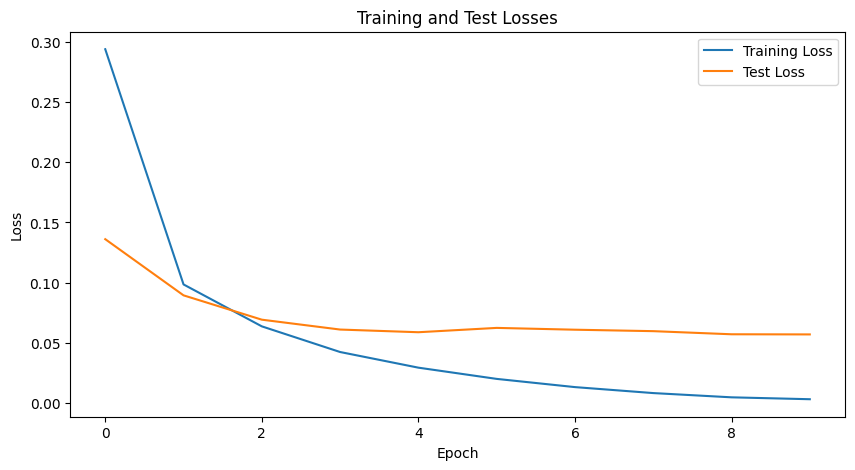

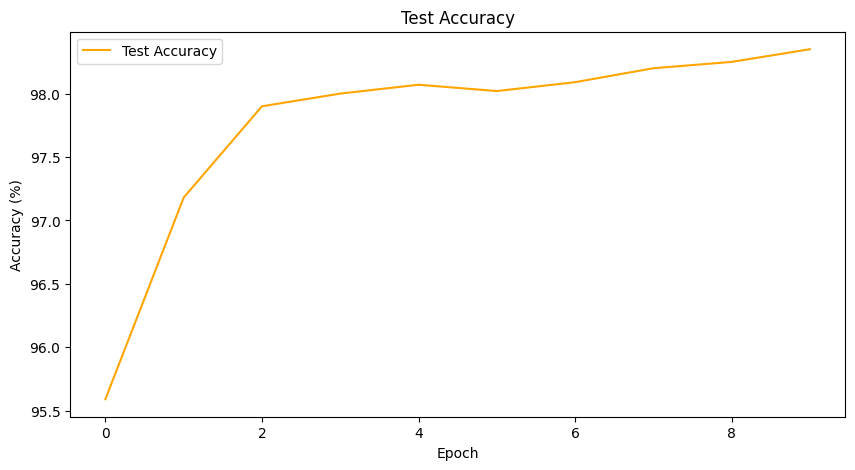

In [11]:
# Insert your code here
# Plot the results

import matplotlib.pyplot as plt

# Plot losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.plot(test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()
plt.show()


In [12]:

class MLP_filtered(nn.Module):
    def __init__(self):
        super(MLP_filtered, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 5)  # Output layer for 5 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [13]:
def train2(model, train_loader, criterion, optimizer, epoch, device):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] '
                  f'Loss: {loss.item():.6f}')
    train_loss /= len(train_loader)
    return train_loss


In [14]:


def test2(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0
    incorrect_samples = []
    correct_samples = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            # Map test target labels to the range of the training labels
            mapped_target = target % 5
            output = model(data)
            test_loss += criterion(output, mapped_target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(mapped_target.view_as(pred)).sum().item()
            # Save incorrect and correct samples
            incorrect_samples.extend([(data[i], pred[i].item(), target[i].item()) for i in range(len(data)) if pred[i] != mapped_target[i]])
            correct_samples.extend([(data[i], pred[i].item(), target[i].item()) for i in range(len(data)) if pred[i] == mapped_target[i]])

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')
    return test_loss, accuracy, incorrect_samples, correct_samples

In [15]:

def filter_dataset(dataset, classes):
    indices = [idx for idx, (_, target) in enumerate(dataset) if target in classes]
    return Subset(dataset, indices)


In [16]:
train_classes = [0, 1, 2, 3, 4]
test_classes = [5, 6, 7, 8, 9]

train_dataset_filtered = filter_dataset(train_dataset, classes=train_classes)
test_dataset_filtered = filter_dataset(test_dataset, classes=test_classes)


In [17]:
train_loader_filtered = DataLoader(dataset=train_dataset_filtered, batch_size=batch_size, shuffle=True, worker_init_fn=seed_worker, generator=g)
test_loader_filtered = DataLoader(dataset=test_dataset_filtered, batch_size=batch_size, shuffle=False, worker_init_fn=seed_worker, generator=g)


In [18]:
model_filtered = MLP_filtered()
model_filtered.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_filtered.parameters(), lr=learning_rate, momentum=momentum)



In [21]:
train_losses_filtered = []
test_losses_filtered = []
test_accuracies_filtered = []

for epoch in range(1, epochs + 1):
    train_loss = train2(model_filtered, train_loader_filtered, criterion, optimizer, epoch, device)
    test_loss, accuracy, incorrect_samples, correct_samples = test2(model_filtered, test_loader_filtered, criterion, device)
    train_losses_filtered.append(train_loss)
    test_losses_filtered.append(test_loss)
    test_accuracies_filtered.append(accuracy)


Train Epoch: 1 [0/30596] Loss: 0.000601
Train Epoch: 1 [6400/30596] Loss: 0.000458
Train Epoch: 1 [12800/30596] Loss: 0.003522
Train Epoch: 1 [19200/30596] Loss: 0.000187
Train Epoch: 1 [25600/30596] Loss: 0.000746

Test set: Average loss: 5.2969, Accuracy: 1795/4861 (36.93%)

Train Epoch: 2 [0/30596] Loss: 0.000174
Train Epoch: 2 [6400/30596] Loss: 0.000593
Train Epoch: 2 [12800/30596] Loss: 0.000553
Train Epoch: 2 [19200/30596] Loss: 0.000054
Train Epoch: 2 [25600/30596] Loss: 0.001064

Test set: Average loss: 5.4249, Accuracy: 1814/4861 (37.32%)

Train Epoch: 3 [0/30596] Loss: 0.000316
Train Epoch: 3 [6400/30596] Loss: 0.000130
Train Epoch: 3 [12800/30596] Loss: 0.001981
Train Epoch: 3 [19200/30596] Loss: 0.000292
Train Epoch: 3 [25600/30596] Loss: 0.000093

Test set: Average loss: 5.5703, Accuracy: 1816/4861 (37.36%)

Train Epoch: 4 [0/30596] Loss: 0.000034
Train Epoch: 4 [6400/30596] Loss: 0.000725
Train Epoch: 4 [12800/30596] Loss: 0.001152
Train Epoch: 4 [19200/30596] Loss: 0.00

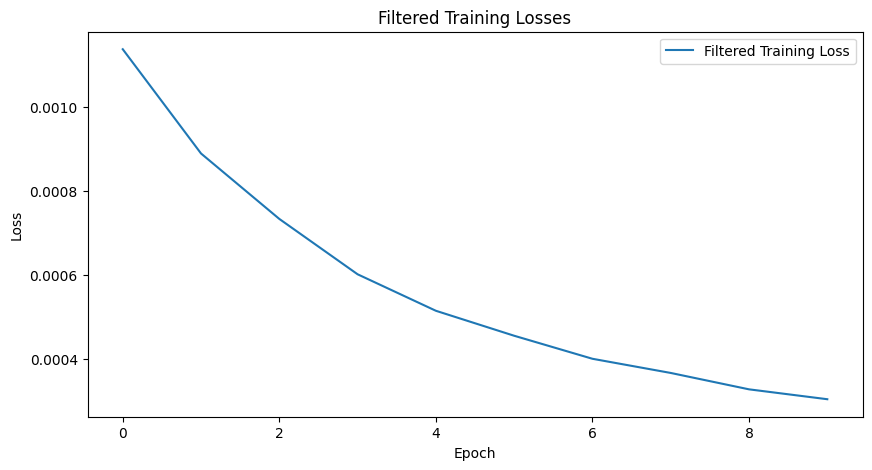

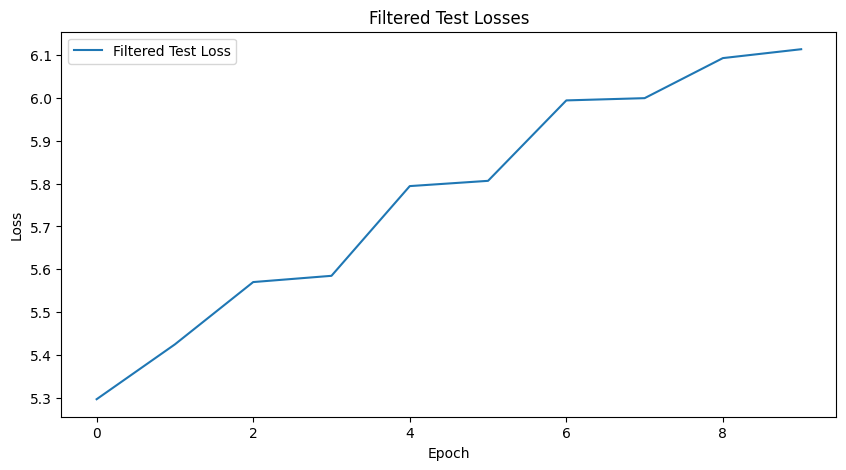

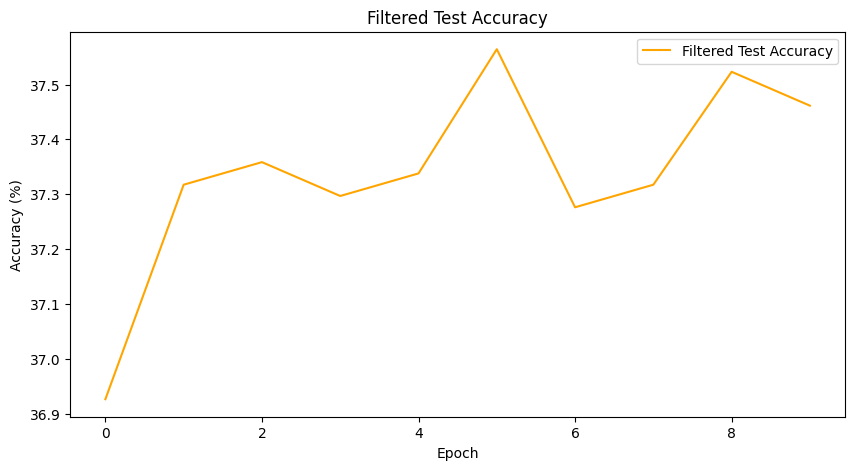

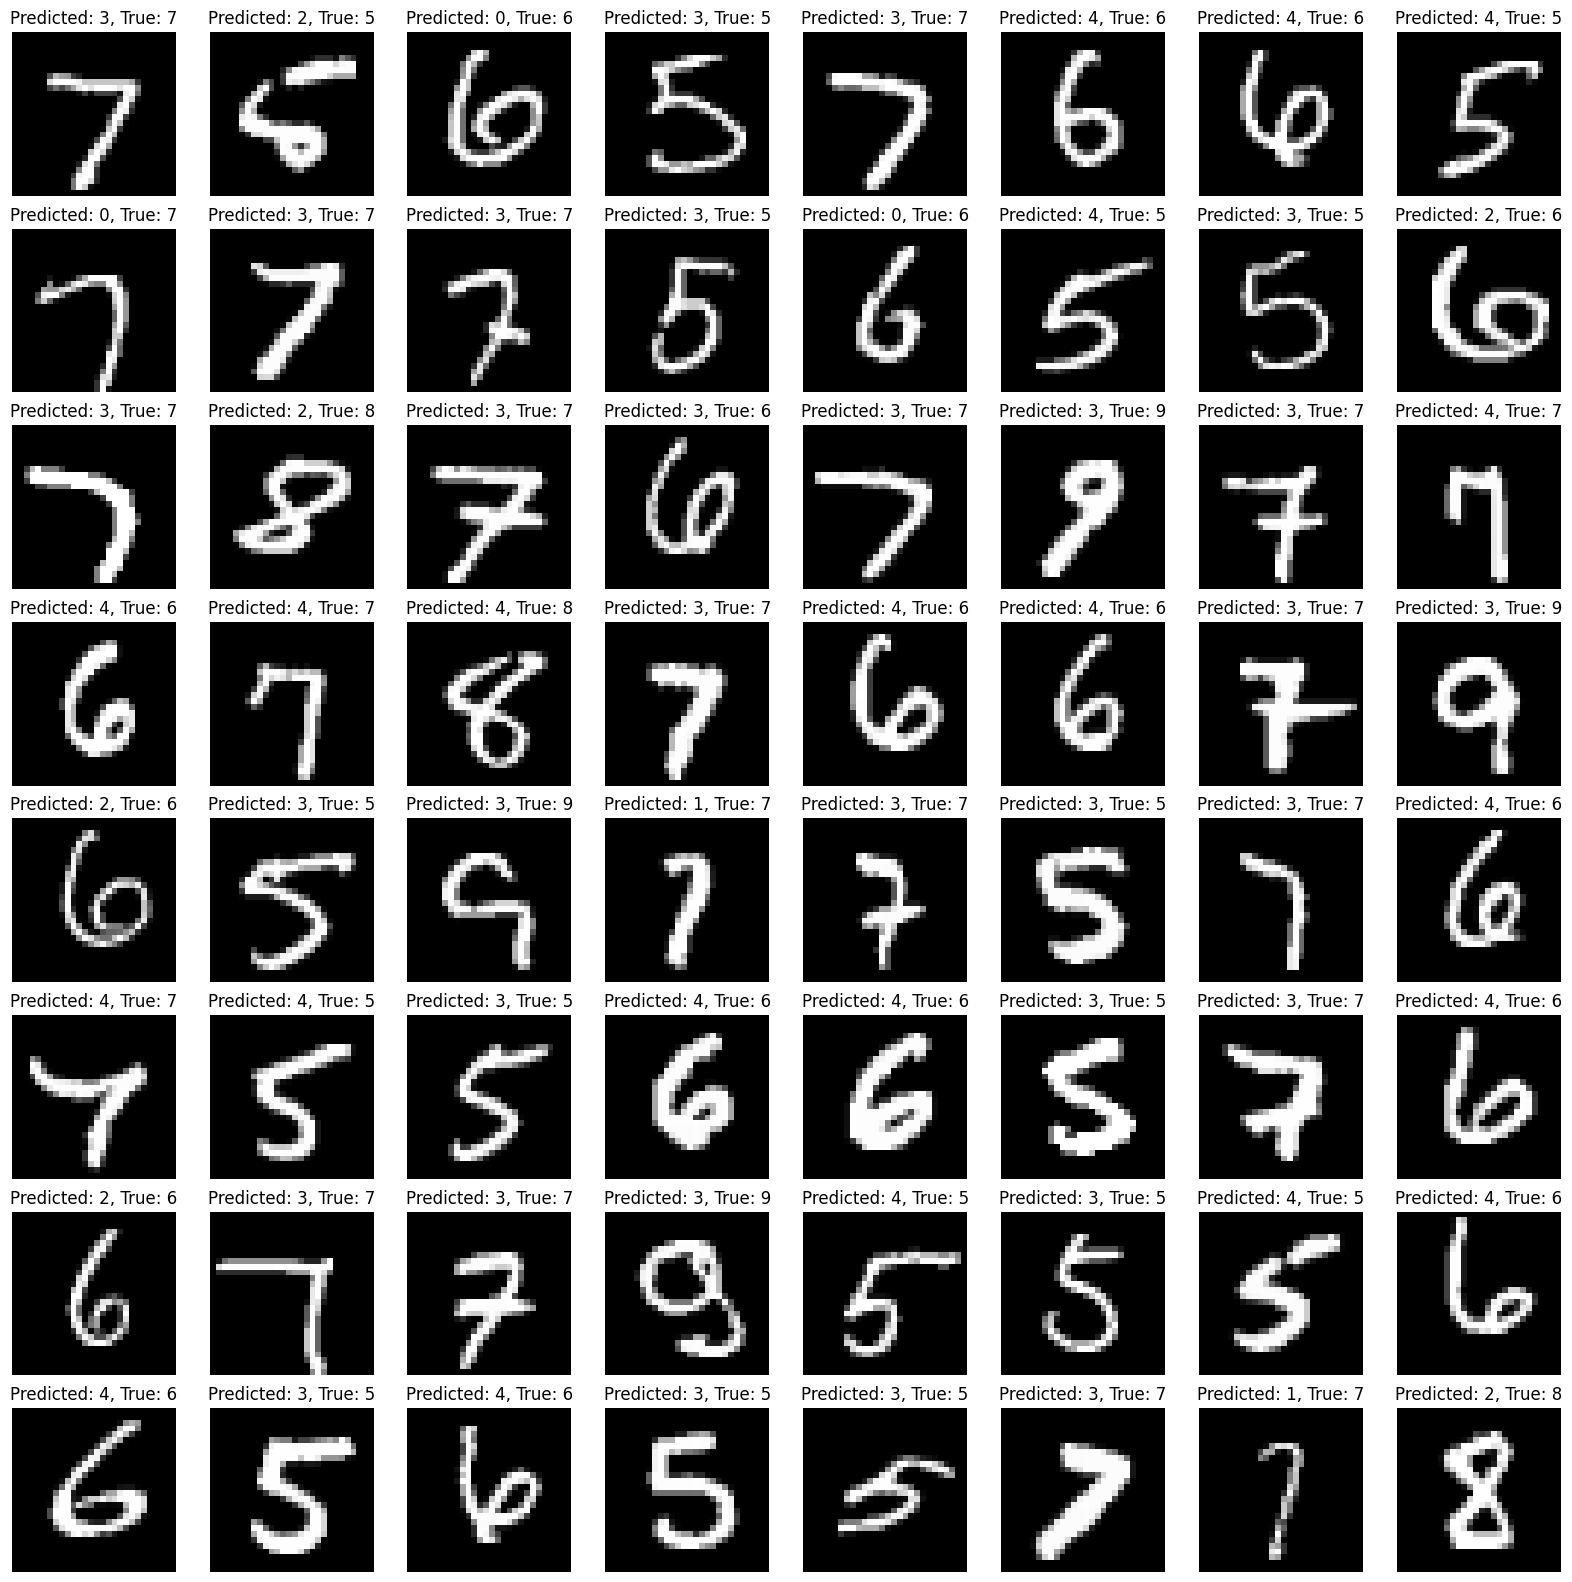

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses_filtered, label='Filtered Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Filtered Training Losses')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(test_losses_filtered, label='Filtered Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Filtered Test Losses')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(test_accuracies_filtered, label='Filtered Test Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Filtered Test Accuracy')
plt.legend()
plt.show()

# Display some incorrect predictions
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, (data, pred, target) in enumerate(incorrect_samples[:64]):
    ax = axes[i // 8, i % 8]
    ax.imshow(data.cpu().numpy().squeeze(), cmap='gray')
    ax.set_title(f'Predicted: {pred}, True: {target}')
    ax.axis('off')
plt.show()




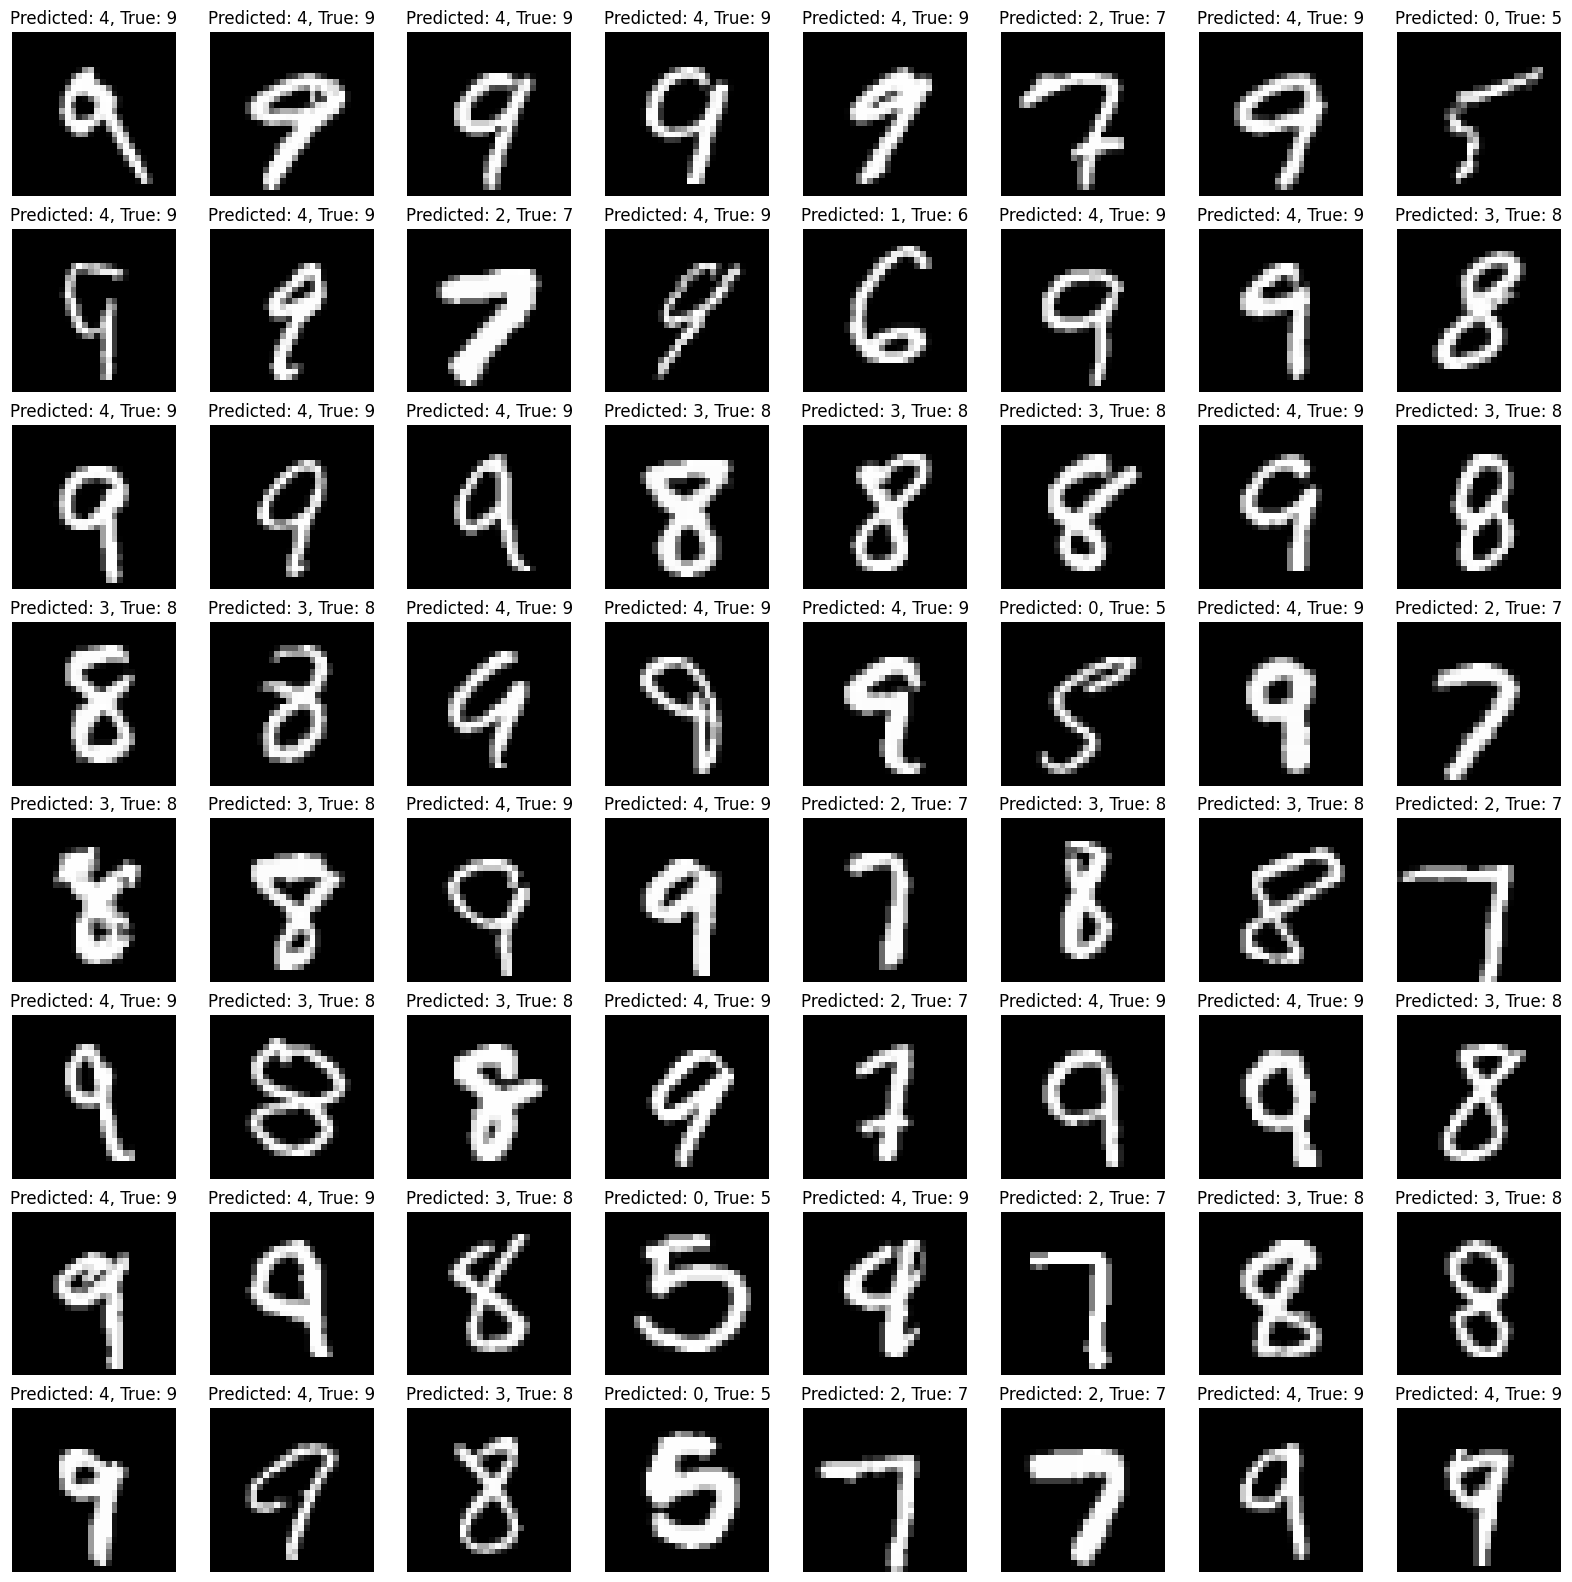

In [26]:
# Display some correct predictions
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i, (data, pred, target) in enumerate(correct_samples[:64]):
    ax = axes[i // 8, i % 8]
    ax.imshow(data.cpu().numpy().squeeze(), cmap='gray')
    ax.set_title(f'Predicted: {pred}, True: {target}')
    ax.axis('off')
plt.show()